In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from ipywidgets import interactive
from scipy.fftpack import fft, ifft,ifftshift,fftshift

In [2]:
def Create_circulant_slow(array_elements):
    N=len(array_elements)
    T=np.zeros((N,N))
    for i in range(N-1):
        T[i+1,i]=1
    T[0,N-1]=1
    circulant_matrix=array_elements[0]*np.eye(N)
    result=T
    for i in range(1,N):
        circulant_matrix+=result*array_elements[i]
        result=np.matmul(result,T)
    return circulant_matrix

def Create_circulant(array_elements):
    N=len(array_elements)
    if N%2==0:
        array_elements=np.roll(array_elements,N//2)
    else:
        array_elements=np.roll(array_elements,(N-1)//2+1)
    circulant=[]
    for i in range(N):
        circulant.append(np.roll(array_elements,i))
    return np.array(circulant)

def Create_anti_circulant(array_elements):
    N=len(array_elements)
    if N%2==0:
        array_elements=np.roll(array_elements,N//2)
    else:
        array_elements=np.roll(array_elements,(N-1)//2+1)
    circulant=[]
    for i in range(N):
        circulant.append(np.roll(array_elements[::-1],-i))
    return np.array(circulant)


N_size=11 #
Gamma=0.5
Lambda=0.5

# ---------------------------------------------------

def Alpha(Gamma,Lambda,theta):
    return Lambda+np.cos(theta)
def Beta(Gamma,Lambda,theta):
    return -Gamma*np.sin(theta)
def Omega(Gamma,Lambda,theta):
    return np.sqrt(Alpha(Gamma,Lambda,theta)**2 + Beta(Gamma,Lambda,theta)**2 )
def Phi(Gamma,Lambda,theta):
    return np.arctan2(Beta(Gamma,Lambda,theta),Alpha(Gamma,Lambda,theta))

# Test 

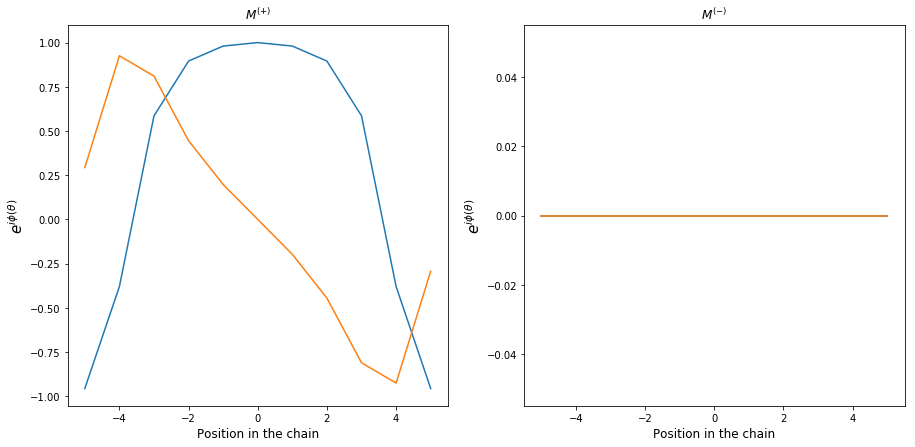

In [3]:
M_plus=1
M_minous=0
if N_size%2==0:
    x=np.arange(-(N_size)/2,(N_size)/2+1)
else:
    x=np.arange(-(N_size-1)/2,(N_size-1)/2+1)

Mplusband=[np.exp(1.j*np.sign((2.0*np.pi/N_size) * i)*Phi(Gamma,Lambda,np.abs((2.0*np.pi/N_size) * i))) for i in x]
Mplusband=M_plus*np.array(Mplusband)
Mminousband=[np.exp(1.j*np.sign((2.0*np.pi/N_size) * i)*Phi(Gamma,Lambda,np.abs((2.0*np.pi/N_size) * i))) for i in x]
Mminousband=M_minous*np.array(Mminousband)


plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.plot(x,Mplusband.real,label="real part")
plt.plot(x,Mplusband.imag,label="imaginary part")
plt.title(r"$M^{(+)}$")
plt.xlabel("Position in the chain",fontsize=12)
plt.ylabel(r"$e^{i\phi(\theta)}$",fontsize=15)
plt.subplot(1,2,2)
plt.plot(x,(Mminousband).real,label="real part")
plt.plot(x,(Mminousband).imag,label="imaginary part")
plt.title(r"$M^{(-)}$")
plt.xlabel("Position in the chain",fontsize=12)
plt.ylabel(r"$e^{i\phi(\theta)}$",fontsize=15)
plt.show()

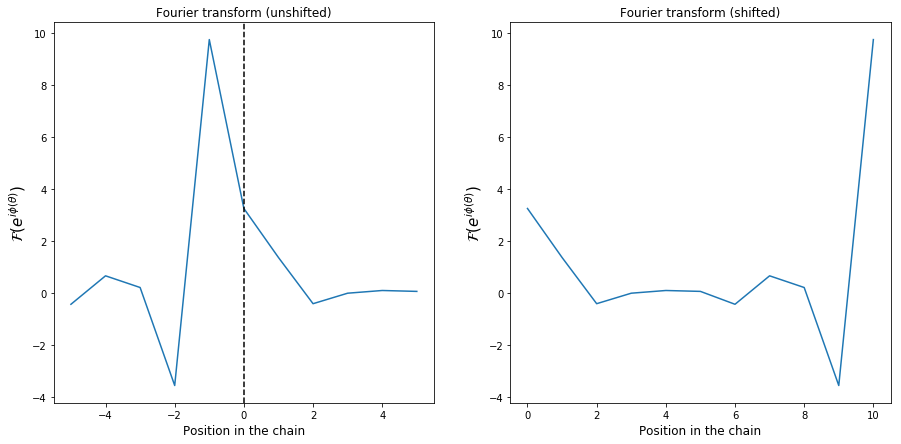

In [4]:
if N_size%2==0:
    x=np.arange(-(N_size)/2,(N_size)/2+1)
else:
    x=np.arange(-(N_size-1)/2,(N_size-1)/2+1)
    
Fourier_Transform_fft=fft(ifftshift(Mplusband))
Fourier_Transform_ifft=fftshift(fft(ifftshift(Mplusband)))

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.plot(x,Fourier_Transform_ifft.real,label="real part")
plt.title(r"Fourier transform (unshifted)")
plt.xlabel("Position in the chain",fontsize=12)
plt.ylabel(r"$\mathcal{F} (e^{i\phi(\theta)})$",fontsize=15)
plt.axvline(x=0,color="k",linestyle="--")
plt.subplot(1,2,2)
x=np.arange(N_size)
plt.plot(x,Fourier_Transform_fft.real,label="real part")
plt.xlabel("Position in the chain",fontsize=12)
plt.ylabel(r"$\mathcal{F} (e^{i\phi(\theta)})$",fontsize=15)
plt.title(r"Fourier transform (shifted)")
plt.show()

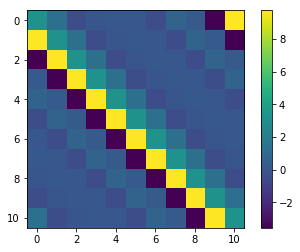

In [5]:
plt.imshow(Create_circulant(Fourier_Transform_ifft).real)
plt.colorbar()
plt.show()

# test using the analithic funtion

In [6]:
def Fourier_theoric(random_numbers_m):   
    result=np.zeros(N_size)
    index_result=0
    for w in np.arange(-(N_size-1)/2,(N_size-1)/2 +1):
        result[index_result]=random_numbers_m[0]+np.sum([2*random_numbers_m[i]*np.cos(Phi(Gamma,Lambda,2.0*np.pi/N_size * i) - w*2*np.pi/N_size*i) for i in range(1,(N_size-1)//2 +1)]) 
        index_result+=1
    return result

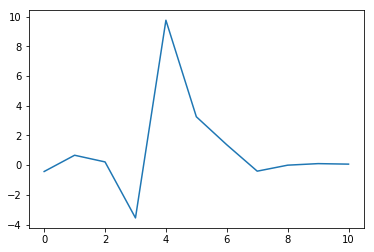

In [7]:
plt.plot(Fourier_theoric(np.ones((N_size-1)//2 +1)))

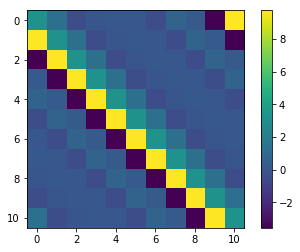

In [8]:
plt.imshow(Create_circulant(Fourier_theoric(np.ones((N_size-1)//2 +1))))
plt.colorbar()
plt.show()

# take a portion of the matrix

In [9]:
def take_portion_of_matrix(matrix,size):
    if size == matrix.shape[0]:
        return matrix.copy()
    
    else:
        row=matrix.shape[0]
        column=matrix.shape[0]
        while  (row + size) >= matrix.shape[0] and (column + size) >= matrix.shape[1]:
            row=np.random.randint(0,matrix.shape[0]-size+1)
            column=np.random.randint(0,matrix.shape[0]-size+1)
        #print(row,row+size,column,column+size)
        new_matrix=matrix[row:row+size,column:column+size]
        return new_matrix

(9, 9)

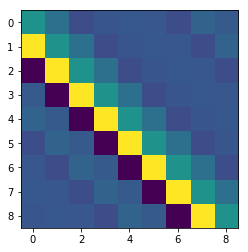

In [10]:
a=take_portion_of_matrix(Create_circulant(Fourier_theoric(np.ones((N_size-1)//2 +1))),9)
plt.imshow(a)
a.shape

# Test to see if this is working

In [11]:
for size in range(1,12):
    for testing in range(1000):
        if take_portion_of_matrix(Create_circulant(Fourier_theoric(np.ones((N_size-1)//2 +1))),size).shape != (size,size):
            print(testing,size)
            print("-"*40)

In [17]:
test=take_portion_of_matrix(Create_circulant(Fourier_theoric(np.ones((N_size-1)//2 +1))),4)

In [19]:
A,D,B=np.linalg.svd(test)

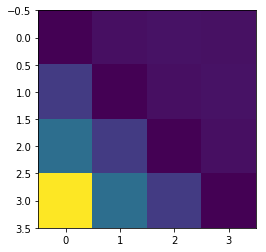

In [31]:
plt.imshow(A@(np.eye(4)*D)@B)

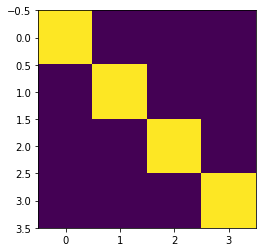

In [22]:
plt.imshow(np.matmul(B,B.T))

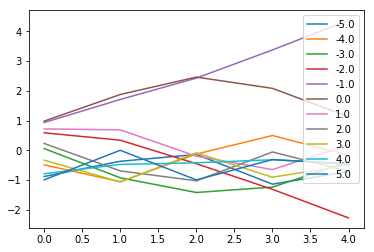

In [13]:
x=np.arange(1,(N_size-1)/2 +1)
for i in np.arange(-(N_size-1)/2,(N_size-1)/2 +1):
    plt.plot(np.cumsum(np.cos(2*np.pi/N_size*x*i-Phi(Gamma,Lambda,2*np.pi/N_size*x))),label=i)
plt.legend()
plt.show()

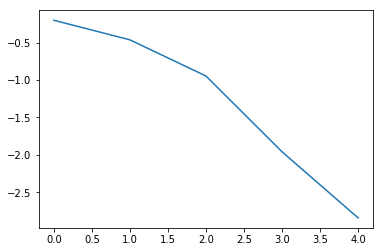

In [14]:
plt.plot(Phi(Gamma,Lambda,2*np.pi/N_size*x))

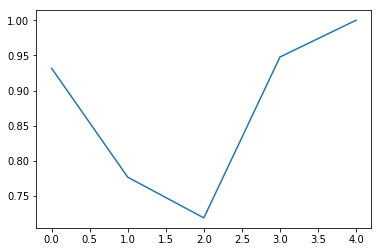

In [15]:
plt.plot(np.cos(2*np.pi/N_size*x+Phi(Gamma,Lambda,2*np.pi/N_size*x)))